# Bayesian coin toss

Emulate any Bernoulli distribution via a coin toss with the Metropolis-Hasting algorithm


In [1]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_candidate(n = 1):
    return bernoulli.rvs(0.5, size = n)

def generate_acc_function(target_p):

    def accept_prob(current, candidate):
        
        current_l = target_p if bool(current) else (1 - target_p)
        candidate_l = target_p if bool(candidate) else (1 - target_p)
        
        prob = candidate_l / current_l
        
        
        return prob
    
    return accept_prob

In [3]:
def sample_mh(target_p, num = 1000, iterations = 100):
    compute_acceptance = generate_acc_function(target_p)
    samples = generate_candidate(num)
    tot_accept = 0
    
    mean = []
    
    for i in range(iterations):
        for n in range(num):
            current = samples[n]
            candidate = generate_candidate()
            acc = compute_acceptance(current, candidate)
         
            unif = np.random.uniform()
            accept = unif < acc
            
            if accept:
                samples[n] = candidate
                tot_accept += 1
                
        mean.append(np.mean(samples))
                    
    acceptance_rate = tot_accept / (n * iterations)
    
    
    return samples, mean, acceptance_rate

In [4]:
samples, mean, rate = sample_mh(0.9, num=2000, iterations=150)

print('Acceptance ratio: ', rate)

Acceptance ratio:  0.6038686009671502


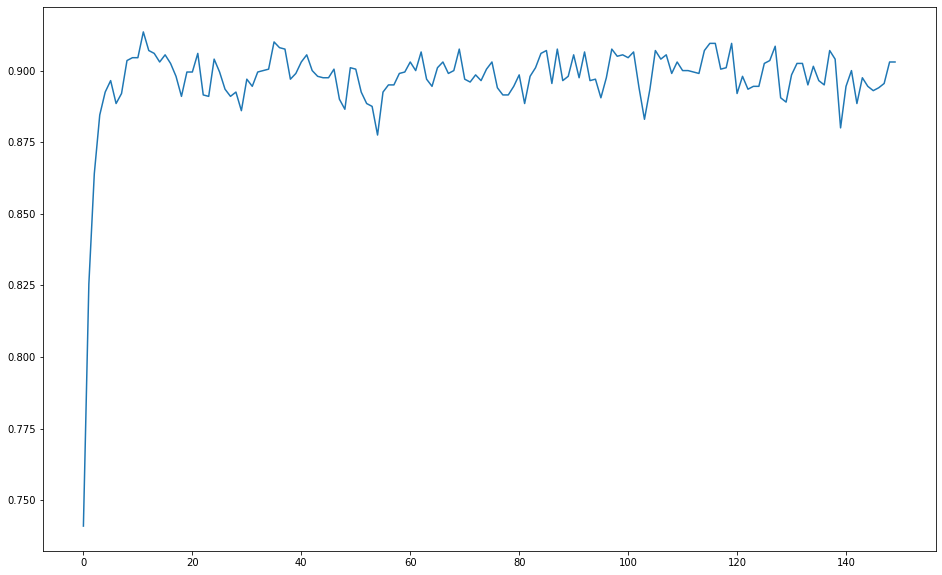

In [5]:
plt.figure(figsize=(16, 10))
plt.plot(mean)
plt.show()